## Identifying Risky Bank Loans

###### Load the packages

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [267]:
# Load the dataset 
credit = pd.read_csv("credit.csv")
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [268]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [269]:
credit['checking_balance'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [270]:
credit['savings_balance'].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [271]:
credit['months_loan_duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: months_loan_duration, dtype: float64

In [272]:
credit['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [273]:
round(credit['default'].value_counts(normalize=True)*100, 1)

no     70.0
yes    30.0
Name: default, dtype: float64

##### Data preparation – creating random training and test datasets

In [274]:
# Create a random order dataframe
np.random.seed(seed=1234)
credit_rand = credit.iloc[np.argsort(np.random.rand(1000)), :]

In [275]:
credit_rand.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
742,unknown,21,good,furniture/appliances,3160,unknown,> 7 years,4,3,41,none,own,1,skilled,1,yes,no
240,< 0 DM,24,good,car,915,unknown,> 7 years,4,2,29,bank,own,1,skilled,1,no,yes
906,< 0 DM,21,good,car,3763,unknown,4 - 7 years,2,2,24,none,own,1,unskilled,1,no,no
646,< 0 DM,30,perfect,furniture/appliances,4583,< 100 DM,1 - 4 years,2,2,32,none,own,2,skilled,1,no,no
609,unknown,15,good,car,1300,unknown,> 7 years,4,4,45,bank,other,1,skilled,2,no,no


In [276]:
# Check that we have the same data frame sorted differently
credit['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [277]:
credit_rand['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [278]:
credit['amount'].head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: amount, dtype: int64

In [279]:
credit_rand['amount'].head()

742    3160
240     915
906    3763
646    4583
609    1300
Name: amount, dtype: int64

###### Maping the categorcal variables which will be used in the feature attributes

In [280]:
credit_rand['checking_balance'] = credit_rand['checking_balance'].map({'unknown': 3, '< 0 DM': 2, '1 - 200 DM': 1, '> 200 DM': 0})
credit_rand['credit_history'] = credit_rand['credit_history'].map({'good':4, 'critical':3, 'poor':2, 'very good': 1, 'perfect': 0})
credit_rand['purpose'] = credit_rand['purpose'].map({'furniture/appliances':5, 'car':4, 'business':3, 'education':2, 'renovations':1, 'car0':0})
credit_rand['savings_balance'] = credit_rand['savings_balance'].map({'< 100 DM':4, 'unknown':3, '100 - 500 DM':2, '500 - 1000 DM':1, '> 1000 DM':0})
credit_rand['employment_duration'] = credit_rand['employment_duration'].map({'1 - 4 years':4, '> 7 years':3, '4 - 7 years':2, '< 1 year':1, 'unemployed':0})
credit_rand['other_credit'] = credit_rand['other_credit'].map({'none':2, 'bank':1, 'store':0})
credit_rand['housing'] = credit_rand['housing'].map({'own':2, 'rent':1, 'other':0})
credit_rand['job'] = credit_rand['job'].map({'skilled':3, 'unskilled':2, 'management':1, 'unemployed':0})
credit_rand['phone'] = credit_rand['phone'].map({'no':1, 'yes':0})

In [281]:
credit_rand['employment_duration'].value_counts()

4    339
3    253
2    174
1    172
0     62
Name: employment_duration, dtype: int64

In [283]:
credit_rand.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
742,3,21,4,5,3160,3,3,4,3,41,2,2,1,3,1,0,no
240,2,24,4,4,915,3,3,4,2,29,1,2,1,3,1,1,yes
906,2,21,4,4,3763,3,2,2,2,24,2,2,1,2,1,1,no
646,2,30,0,5,4583,4,4,2,2,32,2,2,2,3,1,1,no
609,3,15,4,4,1300,3,3,4,4,45,1,0,1,3,2,1,no


In [284]:
X = credit_rand.loc[:, credit_rand.columns != 'default']
y = credit_rand['default']

In [285]:
# Split the dataframe into tain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [286]:
round(y_train.value_counts(normalize=True)*100, 2)

no     70.11
yes    29.89
Name: default, dtype: float64

In [287]:
round(y_test.value_counts(normalize=True)*100, 2)

no     69.0
yes    31.0
Name: default, dtype: float64

##### This appears to be a fairly equal split

# Fit the model

In [288]:
credit_model = DecisionTreeClassifier()
credit_model.fit(X_train, y_train)

DecisionTreeClassifier()

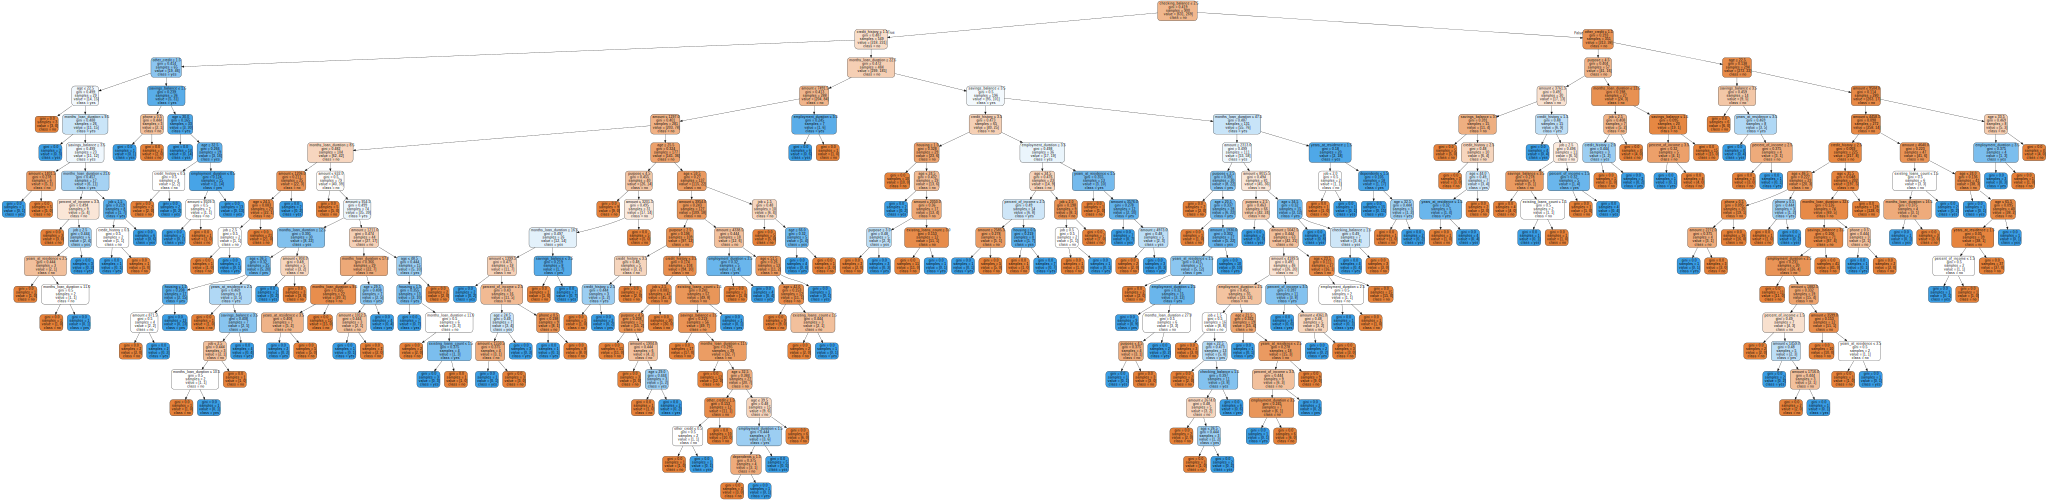

In [294]:
# Visualize th decision tree
import graphviz
dot_data = tree.export_graphviz(credit_model, out_file=None, feature_names=X.columns,class_names=credit_rand.default,filled=True, rounded=True, special_characters=True)
valgTre = graphviz.Source(dot_data) 
valgTre

#### Evaluating model performance

In [295]:
# prediction
y_pred = credit_model.predict(X_test)

In [297]:
print('Accuracy score:\n', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy score:
 0.66
Confusion matrix: 
 [[54 15]
 [19 12]]


#### Improve the model performance

In [324]:
# Use Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
credit_boost = AdaBoostClassifier(n_estimators=150,learning_rate=1.0)
credit_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150)

In [325]:
y_pred1 = credit_boost.predict(X_test)

In [326]:
print('Accuracy score:\n', accuracy_score(y_test, y_pred1))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred1))

Accuracy score:
 0.7
Confusion matrix: 
 [[59 10]
 [20 11]]


In [333]:
# Use Gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
credit_boost1 = GradientBoostingClassifier(n_estimators=150,learning_rate=1.0)
credit_boost1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=150)

In [334]:
y_pred2 = credit_boost1.predict(X_test)

In [335]:
print('Accuracy score:\n', accuracy_score(y_test, y_pred2))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred2))

Accuracy score:
 0.73
Confusion matrix: 
 [[58 11]
 [16 15]]


#### Acuuracy not suitable for identification of risky bank loan (default). Beacuse here classifier predict False negative too high above 50% defaulters are not correctly classified. So thisidentification of  risky bank loan classifer need more improvement. 